In [930]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
# https://plos.figshare.com/articles/_Eight_Personal_Characteristics_Associated_with_the_Power_to_Live_with_Disasters_as_Indicated_by_Survivors_of_the_2011_Great_East_Japan_Earthquake_Disaster_/1470421

In [949]:
os.getcwd()

'/Users/josephshanks/Downloads'

In [3]:
# https://digital.nhs.uk/data-and-information/publications/statistical/mental-health-of-children-and-young-people-in-england/2017/2017 -----seperate data set that might work


In [17]:
df_agesex=pd.read_excel('S1_File.xlsx', sheet_name='data D')

In [94]:
df_evac_jobs_dmg=pd.read_excel('S1_File.xlsx', sheet_name='data E')

In [98]:
#Reassigning column names to df
df_evac_jobs_dmg.columns = ['ID','Y/N Evacuated', 'Family Inj scale 1-4 5=NA', 'FAIS#2', 'FAIS#3','Drop1','Drop2','Friends Inj scale 1-4 5=NA','FRIS#2', 'FRIS#3','FRIS#4', 'DROP3','Residence DMG','Job affect scale1-4 5=had no job','JAS#2','JAS#3','Drop4','Drop5']

In [140]:
#empty columns - no data
df_evac_jobs_dmg.drop(labels=['Drop1','Drop2','DROP3','Drop4','Drop5'], axis=1, inplace=True)


In [139]:
df_evac_jobs_dmg

,ID,Y/N Evacuated,Family Inj scale 1-4 5=NA,FAIS#2,FAIS#3,Friends Inj scale 1-4 5=NA,FRIS#2,FRIS#3,FRIS#4,Residence DMG,Job affect scale1-4 5=had no job,JAS#2,JAS#3
0,1,2.0,5.0,NaN,NaN,4.0,NaN,NaN,NaN,7.0,1.0,NaN,NaN
1,2,1.0,5.0,NaN,NaN,5.0,NaN,NaN,NaN,5.0,4.0,NaN,NaN
2,3,1.0,1.0,NaN,NaN,5.0,NaN,NaN,NaN,4.0,1.0,NaN,NaN
3,4,1.0,5.0,NaN,NaN,5.0,NaN,NaN,NaN,6.0,4.0,NaN,NaN
4,5,1.0,5.0,NaN,NaN,5.0,NaN,NaN,NaN,7.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,1408,1.0,4.0,NaN,NaN,5.0,NaN,NaN,NaN,7.0,4.0,NaN,NaN
1408,1409,2.0,5.0,NaN,NaN,5.0,NaN,NaN,NaN,7.0,1.0,NaN,NaN
1409,1410,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,7.0,4.0,NaN,NaN
1410,1411,1.0,1.0,NaN,NaN,4.0,NaN,NaN,NaN,7.0,4.0,NaN,NaN


In [149]:
df_personality=pd.read_excel('S1_File.xlsx', sheet_name='data P')

In [351]:
df_personality.set_index("ID", inplace=True)

KeyError: "None of ['ID'] are in the columns"

In [311]:
print(quartile_personality(df_p_altruism))
print(quartile_personality(df_p_emotional_regulation))
print(quartile_personality(df_p_leadership))
print(quartile_personality(df_p_problem_solving))
print(quartile_personality(df_p_self_improvement))
print(quartile_personality(df_p_self_transcendence))
print(quartile_personality(df_p_stubbornness))
print(quartile_personality(df_p_etiquette))

(Index([1, 2, 4, 5, 6], dtype='object'), array([13., 18.]))
(Index([19, 20, 21, 22], dtype='object'), array([11.75, 15.  ]))
(Index([26, 30, 31, 39, 40], dtype='object'), array([10., 16.]))
(Index([13, 23, 24, 25, 33], dtype='object'), array([14., 19.]))
(Index([34, 35, 36], dtype='object'), array([ 7., 11.]))
(Index([15, 16, 17, 18], dtype='object'), array([12., 16.]))
(Index([8, 7, 9, 11, 12], dtype='object'), array([12., 18.]))
(Index([28, 37, 38], dtype='object'), array([11., 14.]))


In [514]:
#Creating altruism personality group
#Assigning null's as the avg of similiar test questions
df_p_altruism = df_personality[[1,2,4,5,6]]
df_p_altruism = df_p_altruism.apply(lambda x: x.fillna(x.mean()), axis=1)
df_p_altruism = df_p_altruism.dropna()
df_p_altruism = df_p_altruism.join(df_imevac_health_domains['Unnamed: 16'], on='ID')
df_p_altruism = df_p_altruism.dropna(subset=['Unnamed: 16'])
df_p_altruism.isna().sum()


1              0
2              0
4              0
5              0
6              0
Unnamed: 16    0
dtype: int64

In [428]:
# cols = [col for col in df_p_altruism.columns if type(col) == int]
# cols

In [427]:
# for i in cols:
#      df_p_altruism[i] =  np.where(df_p_altruism[1].isnull(), df_p_altruism['avg'], df_p_altruism[1])
#     df_p_altruism.isna().sum()

In [431]:
# test = df_p_stubbornness.copy()
# test = test.apply(lambda x: x.fillna(x.mean()), axis=1)
# test = test.dropna()
# test = test.join(df_imevac_health_domains['Unnamed: 16'], on='ID')
# test = test.dropna(subset=['Unnamed: 16'])
# test


In [464]:
#Creating Stubbornness personality group
df_p_stubbornness = df_personality[[8,7,9,11,12]]
df_p_stubbornness =df_p_stubbornness.apply(lambda x: x.fillna(x.mean()), axis=1)
df_p_stubbornness = df_p_stubbornness.dropna()
df_p_stubbornness =df_p_stubbornness.join(df_imevac_health_domains['Unnamed: 16'], on='ID')
df_p_stubbornness = df_p_stubbornness.dropna(subset=['Unnamed: 16'])


In [465]:
#Creating Self Transcendence personality group
df_p_self_transcendence = df_personality[[15,16,17,18]]
df_p_self_transcendence = df_p_self_transcendence.apply(lambda x: x.fillna(x.mean()), axis=1)
df_p_self_transcendence = df_p_self_transcendence.dropna()
df_p_self_transcendence = df_p_self_transcendence.join(df_imevac_health_domains['Unnamed: 16'], on='ID')
df_p_self_transcendence = df_p_self_transcendence.dropna(subset=['Unnamed: 16'])


In [466]:
#Creating Emotional Regulation personality group
df_p_emotional_regulation = df_personality[[19,20,21,22]]
df_p_emotional_regulation = df_p_emotional_regulation.apply(lambda x: x.fillna(x.mean()), axis=1)
df_p_emotional_regulation = df_p_emotional_regulation.dropna()
df_p_emotional_regulation =df_p_emotional_regulation.join(df_imevac_health_domains['Unnamed: 16'], on='ID')
df_p_emotional_regulation = df_p_emotional_regulation.dropna(subset=['Unnamed: 16'])
df_p_emotional_regulation

,19,20,21,22,Unnamed: 16
ID,,,,,
1,3.0,1.0,2.0,2.0,1.0
2,4.0,3.0,3.0,2.0,0.0
3,3.0,2.0,2.0,2.0,0.0
4,4.0,1.0,3.0,3.0,0.0
5,4.0,3.0,3.0,3.0,0.0
...,...,...,...,...,...
1408,4.0,5.0,5.0,5.0,2.0
1409,3.0,2.0,2.0,2.0,2.0
1410,4.0,3.0,3.0,3.0,2.0


In [467]:
#Creating Problem Solving personality group
df_p_problem_solving = df_personality[[13,23,24,25,33]]
df_p_problem_solving = df_p_problem_solving.apply(lambda x: x.fillna(x.mean()), axis=1)
df_p_problem_solving = df_p_problem_solving.dropna()
df_p_problem_solving =df_p_problem_solving.join(df_imevac_health_domains['Unnamed: 16'], on='ID')
df_p_problem_solving = df_p_problem_solving.dropna(subset=['Unnamed: 16'])


In [468]:
#Creating Leadership personality group
df_p_leadership = df_personality[[26,30,31,39,40]]
df_p_leadership = df_p_leadership.apply(lambda x: x.fillna(x.mean()), axis=1)
df_p_leadership = df_p_leadership.dropna()
df_p_leadership = df_p_leadership.join(df_imevac_health_domains['Unnamed: 16'], on='ID')
df_p_leadership = df_p_leadership.dropna(subset=['Unnamed: 16'])

In [469]:
#Creating Self Improvement personality group
df_p_self_improvement = df_personality[[34,35,36]]
df_p_self_improvement = df_p_self_improvement.apply(lambda x: x.fillna(x.mean()), axis=1)
df_p_self_improvement = df_p_self_improvement.dropna()
df_p_self_improvement =df_p_self_improvement.join(df_imevac_health_domains['Unnamed: 16'], on='ID')
df_p_self_improvement = df_p_self_improvement.dropna(subset=['Unnamed: 16'])

In [470]:
#Creating Etiquette personality group
df_p_etiquette = df_personality[[28,37,38]]
df_p_etiquette = df_p_etiquette.apply(lambda x: x.fillna(x.mean()), axis=1)
df_p_etiquette = df_p_etiquette.dropna()
df_p_etiquette = df_p_etiquette.join(df_imevac_health_domains['Unnamed: 16'], on='ID')
df_p_etiquette = df_p_etiquette.dropna(subset=['Unnamed: 16'])

In [816]:
df_p_leadership.median()

26             3.0
30             3.0
31             2.0
39             3.0
40             2.0
Unnamed: 16    1.0
dtype: float64

In [234]:
#THIS DF ID MATCHES UP WITH INDEX VALUES WHEN CHANGING DONT ADD ONE!!!!

df_imevac_health_domains = pd.read_excel('S1_File.xlsx', sheet_name='data S')
df_imevac_health_domains= df_imevac_health_domains[1:]


In [235]:
#add in place if needed

#df_imevac_health_domains.dropna(axis=1, how='all')

In [167]:
df_imevac_health_domains.set_index("ID", inplace=True)

,Item#,1,2a,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,3,Unnamed: 148,4,Unnamed: 150,5,Unnamed: 152
ID,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,1.0,2.0,1.0,2.0,2.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,95,100,2,5,3,1
2.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,20,100,2,2,5,2
3.0,NaN,2.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,70,100,1,1,1,0
4.0,NaN,1.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,20,60,1,3,1,3
5.0,NaN,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,60,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408.0,NaN,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,10,50,0,0,0,0
1409.0,NaN,NaN,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,20,60,1,3,1,3
1410.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,10,50,1,3,1,0


In [509]:
# column of "the degree of which one's own mental stability was affected"
new_df=pd.DataFrame()
df_imevac_health_domains['Unnamed: 16']
new_df['Degree of Mental Struggle'] = df_imevac_health_domains['Unnamed: 16'].dropna()
new_df

,Degree of Mental Struggle
1,1.0
2,0.0
3,0.0
4,0.0
5,0.0
...,...
1408,2.0
1409,2.0
1410,2.0
1411,1.0


In [322]:
#df_p_self_improvement.sum(axis=1).describe()

In [323]:
#np.percentile(df_p_self_improvement.sum(axis=1),[25,75])



In [443]:
df_p_self_improvement[df_p_self_improvement['Unnamed: 16'] ==2][df_p_self_improvement[[34,35,36]].sum(axis=1) <=7]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,34,35,36,Unnamed: 16
ID,,,,
18,3.0,2.0,2.0,2.0
71,0.0,2.0,0.0,2.0
78,0.0,2.0,5.0,2.0
82,3.0,1.0,1.0,2.0
97,1.0,2.0,4.0,2.0
...,...,...,...,...
1380,4.0,0.0,0.0,2.0
1388,0.0,2.0,5.0,2.0
1396,2.0,2.0,3.0,2.0


In [444]:
df_p_self_improvement[df_p_self_improvement['Unnamed: 16'] ==2][df_p_self_improvement[[34,35,36]].sum(axis=1) >=11]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,34,35,36,Unnamed: 16
ID,,,,
8,4.0,4.0,4.0,2.0
24,3.0,5.0,5.0,2.0
34,5.0,3.0,5.0,2.0
44,4.0,5.0,5.0,2.0
56,4.0,5.0,4.0,2.0
...,...,...,...,...
1299,4.0,4.0,4.0,2.0
1301,3.0,5.0,3.0,2.0
1390,3.0,5.0,3.0,2.0


In [471]:
#This has already been checked for accuracy after I avg'd the nulls and took out nulls. For emotional regulation the 25 percentile is actually an even 12

def quartile_personality(df_p):
    return df_p.columns,np.percentile(df_p.sum(axis=1),[25,75])

In [446]:
#Equal to or greater than 75 percentile of altruism
df_p_altruism[df_p_altruism['Unnamed: 16'] ==2][df_p_altruism[[1,2,4,5,6]].sum(axis=1) >=18]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,1,2,4,5,6,Unnamed: 16
ID,,,,,,
8,4.0,4.0,5.0,5.0,4.0,2.0
24,5.0,4.0,5.0,5.0,5.0,2.0
34,4.0,3.0,3.0,5.0,3.0,2.0
56,5.0,3.0,4.0,3.0,4.0,2.0
68,4.0,4.0,4.0,5.0,4.0,2.0
...,...,...,...,...,...,...
1370,5.0,5.0,0.0,4.0,5.0,2.0
1388,3.0,5.0,2.0,5.0,4.0,2.0
1392,4.0,3.0,1.0,5.0,5.0,2.0


In [447]:
#Equal to or less than 25 percentile
df_p_altruism[df_p_altruism['Unnamed: 16'] ==2][df_p_altruism[[1,2,4,5,6]].sum(axis=1) <=13]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,1,2,4,5,6,Unnamed: 16
ID,,,,,,
40,2.0,2.0,3.0,3.0,1.0,2.0
60,3.0,2.0,3.0,3.0,1.0,2.0
62,2.0,2.0,3.0,2.0,3.0,2.0
71,2.0,0.0,1.0,1.0,4.0,2.0
78,1.0,1.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...
1377,2.0,2.0,3.0,3.0,2.0,2.0
1380,2.0,0.0,0.0,0.0,1.0,2.0
1393,3.0,2.0,1.0,3.0,4.0,2.0


In [448]:
df_p_emotional_regulation[df_p_emotional_regulation['Unnamed: 16'] ==2][df_p_emotional_regulation[[19,20,21,22]].sum(axis=1) <=12]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,19,20,21,22,Unnamed: 16
ID,,,,,
40,2.0,1.0,2.0,2.0,2.0
62,3.0,2.0,2.0,2.0,2.0
71,0.0,0.0,0.0,0.0,2.0
78,1.0,3.0,3.0,3.0,2.0
87,4.0,2.0,3.0,2.0,2.0
...,...,...,...,...,...
1383,3.0,3.0,3.0,2.0,2.0
1388,1.0,0.0,0.0,1.0,2.0
1393,2.0,2.0,2.0,1.0,2.0


In [472]:
df_p_emotional_regulation[df_p_emotional_regulation['Unnamed: 16'] ==2][df_p_emotional_regulation[[19,20,21,22]].sum(axis=1) >=15]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,19,20,21,22,Unnamed: 16
ID,,,,,
24,5.0,3.0,5.0,5.0,2.0
56,5.0,5.0,3.0,4.0,2.0
60,5.0,4.0,3.0,3.0,2.0
68,4.0,4.0,4.0,5.0,2.0
122,3.0,4.0,3.0,5.0,2.0
...,...,...,...,...,...
1297,3.0,5.0,4.0,5.0,2.0
1323,4.0,4.0,3.0,4.0,2.0
1331,3.0,4.0,4.0,4.0,2.0


In [475]:
df_p_leadership[df_p_leadership['Unnamed: 16'] ==2][df_p_leadership[[26, 30, 31, 39, 40]].sum(axis=1) <=10]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,26,30,31,39,40,Unnamed: 16
ID,,,,,,
18,2.0,2.0,2.0,2.0,2.0,2.0
71,1.0,0.0,0.0,0.0,0.0,2.0
94,2.0,3.0,2.0,2.0,0.0,2.0
97,2.0,1.0,1.0,1.0,1.0,2.0
122,4.0,1.0,2.0,0.0,1.0,2.0
...,...,...,...,...,...,...
1377,2.0,1.0,1.0,3.0,2.0,2.0
1380,3.0,0.0,0.0,1.0,0.0,2.0
1393,3.0,3.0,2.0,1.0,1.0,2.0


In [476]:
df_p_leadership[df_p_leadership['Unnamed: 16'] ==2][df_p_leadership[[26, 30, 31, 39, 40]].sum(axis=1) >=16]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,26,30,31,39,40,Unnamed: 16
ID,,,,,,
8,4.0,3.0,4.0,4.0,4.0,2.0
24,5.0,4.0,4.0,5.0,4.0,2.0
44,3.0,4.0,3.0,5.0,3.0,2.0
56,4.0,3.0,3.0,4.0,4.0,2.0
68,5.0,5.0,5.0,5.0,5.0,2.0
...,...,...,...,...,...,...
1278,5.0,0.0,3.0,5.0,3.0,2.0
1383,3.0,2.0,4.0,3.0,4.0,2.0
1388,5.0,4.0,4.0,5.0,5.0,2.0


In [477]:
df_p_problem_solving[df_p_problem_solving['Unnamed: 16'] ==2][df_p_problem_solving[[13, 23, 24, 25, 33]].sum(axis=1) <=14]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,13,23,24,25,33,Unnamed: 16
ID,,,,,,
18,1.0,3.0,3.0,3.0,2.0,2.0
40,1.0,2.0,2.0,2.0,3.0,2.0
62,3.0,2.0,2.0,2.0,2.0,2.0
71,0.0,0.0,0.0,0.0,3.0,2.0
87,3.0,3.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...
1388,0.0,1.0,2.0,1.0,5.0,2.0
1390,0.0,1.0,5.0,3.0,5.0,2.0
1392,2.0,3.0,3.0,3.0,3.0,2.0


In [479]:
df_p_problem_solving[df_p_problem_solving['Unnamed: 16'] ==2][df_p_problem_solving[[13, 23, 24, 25, 33]].sum(axis=1) >=19]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,13,23,24,25,33,Unnamed: 16
ID,,,,,,
24,5.00,5.0,4.0,5.0,5.0,2.0
56,2.00,5.0,5.0,5.0,4.0,2.0
60,3.00,3.0,4.0,4.0,5.0,2.0
68,3.00,4.0,5.0,5.0,5.0,2.0
78,4.25,3.0,5.0,4.0,5.0,2.0
...,...,...,...,...,...,...
1259,4.00,3.0,4.0,5.0,4.0,2.0
1265,3.00,5.0,5.0,4.0,5.0,2.0
1296,5.00,5.0,5.0,5.0,3.0,2.0


In [480]:
df_p_self_improvement[df_p_self_improvement['Unnamed: 16'] ==2][df_p_self_improvement[[34,35,36]].sum(axis=1) <=7]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,34,35,36,Unnamed: 16
ID,,,,
18,3.0,2.0,2.0,2.0
71,0.0,2.0,0.0,2.0
78,0.0,2.0,5.0,2.0
82,3.0,1.0,1.0,2.0
97,1.0,2.0,4.0,2.0
...,...,...,...,...
1380,4.0,0.0,0.0,2.0
1388,0.0,2.0,5.0,2.0
1396,2.0,2.0,3.0,2.0


In [481]:
df_p_self_improvement[df_p_self_improvement['Unnamed: 16'] ==2][df_p_self_improvement[[34,35,36]].sum(axis=1) >=11]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,34,35,36,Unnamed: 16
ID,,,,
8,4.0,4.0,4.0,2.0
24,3.0,5.0,5.0,2.0
34,5.0,3.0,5.0,2.0
44,4.0,5.0,5.0,2.0
56,4.0,5.0,4.0,2.0
...,...,...,...,...
1299,4.0,4.0,4.0,2.0
1301,3.0,5.0,3.0,2.0
1390,3.0,5.0,3.0,2.0


In [482]:
df_p_self_transcendence[df_p_self_transcendence['Unnamed: 16'] ==2][df_p_self_transcendence[[15, 16, 17, 18]].sum(axis=1) <=12]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,15,16,17,18,Unnamed: 16
ID,,,,,
44,4.0,2.0,3.0,3.0,2.0
62,2.0,2.0,2.0,2.0,2.0
71,0.0,5.0,0.0,3.0,2.0
95,3.0,3.0,3.0,3.0,2.0
97,2.0,4.0,4.0,2.0,2.0
...,...,...,...,...,...
1331,3.0,3.0,3.0,3.0,2.0
1347,3.0,3.0,3.0,3.0,2.0
1363,3.0,3.0,3.0,3.0,2.0


In [483]:
df_p_self_transcendence[df_p_self_transcendence['Unnamed: 16'] ==2][df_p_self_transcendence[[15, 16, 17, 18]].sum(axis=1) >=16]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,15,16,17,18,Unnamed: 16
ID,,,,,
24,5.0,5.0,5.0,5.0,2.0
56,5.0,4.0,5.0,5.0,2.0
78,5.0,5.0,5.0,5.0,2.0
82,5.0,5.0,4.0,3.0,2.0
87,3.0,5.0,5.0,3.0,2.0
...,...,...,...,...,...
1297,4.0,5.0,5.0,5.0,2.0
1323,3.0,5.0,5.0,5.0,2.0
1390,5.0,5.0,5.0,5.0,2.0


In [484]:
df_p_stubbornness[df_p_stubbornness['Unnamed: 16'] ==2][df_p_stubbornness[[8, 7, 9, 11, 12]].sum(axis=1) <=12]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,8,7,9,11,12,Unnamed: 16
ID,,,,,,
40,2.0,1.0,2.0,1.0,1.0,2.0
78,1.0,1.0,1.0,1.0,1.0,2.0
94,0.0,3.0,0.0,0.0,1.0,2.0
136,1.0,2.0,1.0,0.0,3.0,2.0
170,1.0,1.0,1.0,1.0,3.0,2.0
...,...,...,...,...,...,...
1370,1.0,5.0,5.0,0.0,0.0,2.0
1377,2.0,2.0,2.0,2.0,2.0,2.0
1396,1.0,4.0,3.0,1.0,3.0,2.0


In [485]:
df_p_stubbornness[df_p_stubbornness['Unnamed: 16'] ==2][df_p_stubbornness[[8, 7, 9, 11, 12]].sum(axis=1) >=18]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,8,7,9,11,12,Unnamed: 16
ID,,,,,,
8,2.0,4.0,3.0,4.0,5.0,2.0
24,4.0,4.0,4.0,4.0,4.0,2.0
56,3.0,3.0,4.0,4.0,5.0,2.0
62,4.0,4.0,3.0,4.0,4.0,2.0
71,5.0,0.0,5.0,5.0,5.0,2.0
...,...,...,...,...,...,...
1388,4.0,3.0,3.0,3.0,5.0,2.0
1390,5.0,5.0,5.0,2.0,5.0,2.0
1392,3.0,4.0,4.0,5.0,5.0,2.0


In [486]:
df_p_etiquette[df_p_etiquette['Unnamed: 16'] ==2][df_p_etiquette[[28, 37, 38]].sum(axis=1) <=11]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,28,37,38,Unnamed: 16
ID,,,,
18,3.0,4.0,3.0,2.0
62,3.0,2.0,3.0,2.0
68,5.0,1.0,5.0,2.0
75,3.0,4.0,3.0,2.0
82,3.0,1.0,5.0,2.0
...,...,...,...,...
1377,4.0,3.0,3.0,2.0
1380,3.0,4.0,3.0,2.0
1391,3.0,4.0,4.0,2.0


People who valued  etiquette the least but also scored high in mental trauma from the earthquake

In [488]:
df_p_etiquette[df_p_etiquette['Unnamed: 16'] ==2][df_p_etiquette[[28, 37, 38]].sum(axis=1) >=14]

/Users/josephshanks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


115

People who valued  etiquette the most and also scored high in mental trauma from the earthquake

In [ ]:
d=pd.DataFrame({'count':[]}

)

In [64]:
group_sex=df_agesex.groupby('Sex')

In [90]:
# for group in group_sex:
#     print('Group Name: ', group[0])
#     print('Group Data:\n', group[1])
#     print('\n')

In [91]:
# y=df_agesex['Sex']==2

In [634]:
df_agesex[df_agesex['Sex']==2]['Sex','Age'] 

KeyError: ('Sex', 'Age')

In [ ]:
x = np.arange(

fig, ax = plt.subplots()

bars = ax.bar(x, record_counts['count'])
# Make the ticks at the center of the bar using:
#   center = left_edge + 0.5*width
ax.set_xticks(x)
ax.set_xticklabels(record_counts['genre'])

In [519]:
def histogram_maker(df):
    cols = [col for col in df.columns if type(col) == int]
    return df[cols].sum(axis=1)

histogram_maker(df_p_leadership).isna().sum()

0

In [504]:
df_df = pd.DataFrame()

In [528]:
df_df['etiquette'] = histogram_maker(df_p_etiquette)
df_df['altruism'] = histogram_maker(df_p_altruism)
df_df['emotional regulation'] = histogram_maker(df_p_emotional_regulation)
df_df['leadership'] = histogram_maker(df_p_leadership)
df_df['problem solving'] = histogram_maker(df_p_problem_solving)
df_df['self improvement'] = histogram_maker(df_p_self_improvement)
df_df['self transcendence'] = histogram_maker(df_p_self_transcendence)
df_df['stubbornness'] = histogram_maker(df_p_stubbornness)
df_df['Degree of mental struggle'] = new_df['Degree of Mental Struggle']
df_df

,etiquette,altruism,emotional regulation,leadership,problem solving,self improvement,self transcendence,stubbornness,Degree of mental struggle
ID,,,,,,,,,
1,11.0,16.0,8.0,14.0,18.0,7.0,16.0,17.0,1.0
2,10.0,16.0,12.0,5.0,19.0,6.0,14.0,17.0,0.0
3,12.0,17.0,9.0,12.0,17.0,7.0,12.0,17.0,0.0
4,12.0,22.0,11.0,10.0,18.0,8.0,14.0,20.0,0.0
5,10.0,16.0,13.0,15.0,16.0,9.0,12.0,18.0,0.0
...,...,...,...,...,...,...,...,...,...
1408,14.0,20.0,19.0,21.0,17.0,11.0,18.0,19.0,2.0
1409,14.0,15.0,9.0,18.0,17.0,6.0,14.0,7.0,2.0
1410,14.0,17.0,13.0,12.0,16.0,10.0,16.0,20.0,2.0


In [952]:
cd C

/Users/josephshanks/Capstone1


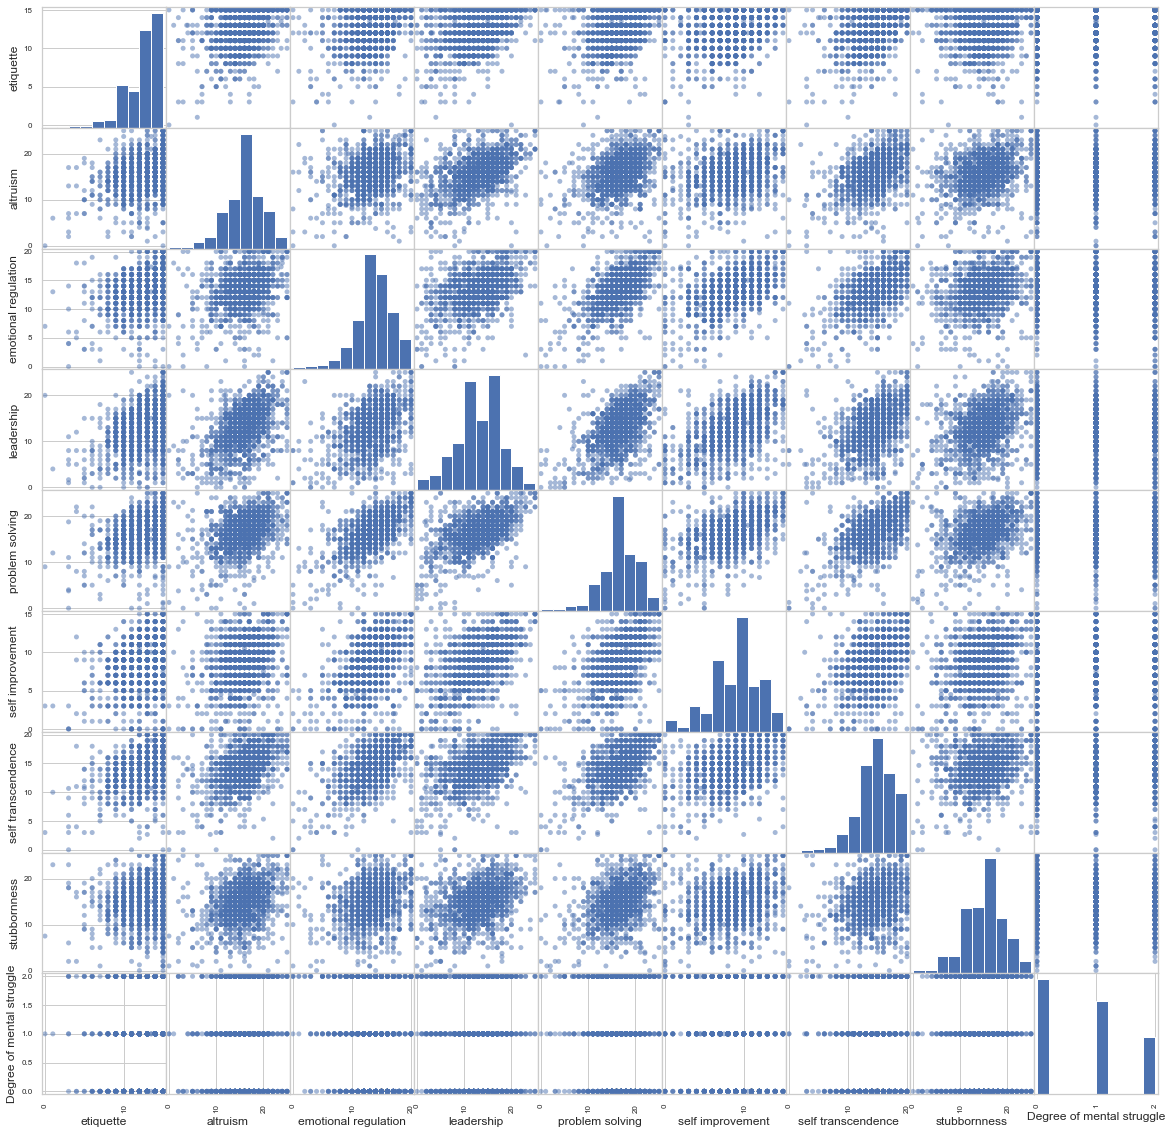

In [953]:
fig=pd.plotting.scatter_matrix(df_df, figsize=(20, 20), s=100);

plt.savefig('Images/scatter.png')

In [563]:
def jitterplot(col):

    return sns.swarmplot(data=df_df,
                  x=df_df['Degree of mental struggle'],
                  y=df_df[col]);


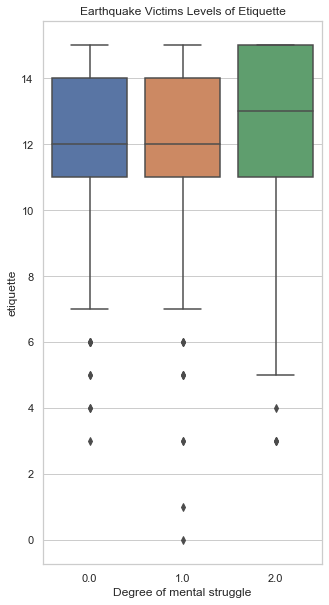

In [954]:
fig,ax = plt.subplots(figsize=(5,10))

ax = sns.boxplot(x=df_df['Degree of mental struggle'], y=df_df['etiquette'], data=df_df)
#ax = jitterplot('etiquette')
ax.set_title('Earthquake Victims Levels of Etiquette')
plt.savefig('Images/Etiquette.png')

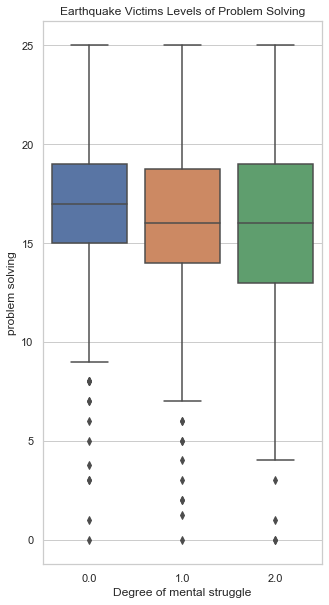

In [955]:
fig,ax = plt.subplots(figsize=(5,10))

ax = sns.boxplot(x=df_df['Degree of mental struggle'], y=df_df['problem solving'], data=df_df)
#ax = jitterplot('problem solving')
ax.set_title('Earthquake Victims Levels of Problem Solving')
plt.savefig('Images/ProblemSolving.png')

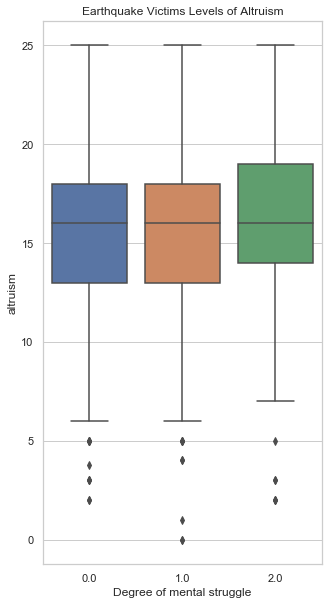

In [956]:
fig,ax = plt.subplots(figsize=(5,10))

ax = sns.boxplot(x=df_df['Degree of mental struggle'], y=df_df['altruism'], data=df_df)
#ax = jitterplot('altruism')
ax.set_title('Earthquake Victims Levels of Altruism')
plt.savefig('Images/Altruism.png')

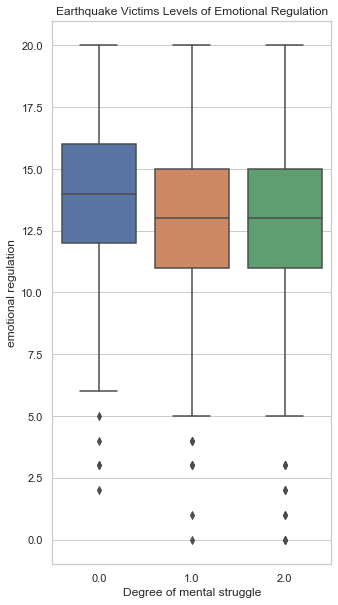

In [957]:
fig,ax = plt.subplots(figsize=(5,10))

ax = sns.boxplot(x=df_df['Degree of mental struggle'], y=df_df['emotional regulation'], data=df_df)
#ax = jitterplot('emotional regulation')
ax.set_title('Earthquake Victims Levels of Emotional Regulation')
plt.savefig('Images/EmoReg.png')

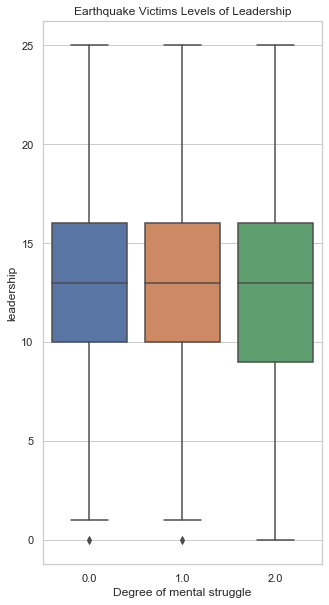

In [958]:
fig,ax = plt.subplots(figsize=(5,10))

ax = sns.boxplot(x=df_df['Degree of mental struggle'], y=df_df['leadership'], data=df_df)
#ax = jitterplot('leadership')
ax.set_title('Earthquake Victims Levels of Leadership')
plt.savefig('Images/Leadership.png')

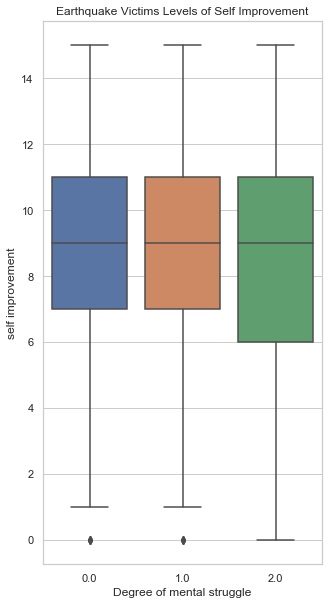

In [959]:
fig,ax = plt.subplots(figsize=(5,10))

ax = sns.boxplot(x=df_df['Degree of mental struggle'], y=df_df['self improvement'], data=df_df)
#ax = jitterplot('self improvement')
ax.set_title('Earthquake Victims Levels of Self Improvement')
plt.savefig('Images/SelfImprove.png')

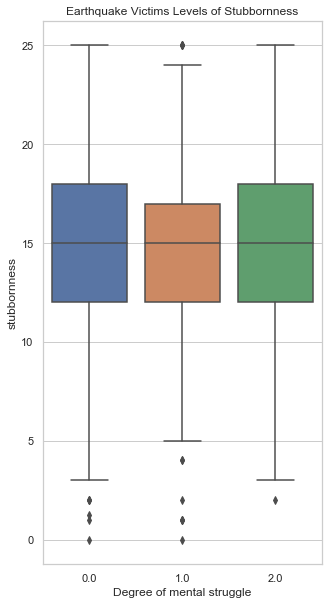

In [960]:
fig,ax = plt.subplots(figsize=(5,10))

ax = sns.boxplot(x=df_df['Degree of mental struggle'], y=df_df['stubbornness'], data=df_df)
#ax = jitterplot('stubbornness')
ax.set_title('Earthquake Victims Levels of Stubbornness')
plt.savefig('Images/Stubbornness.png')

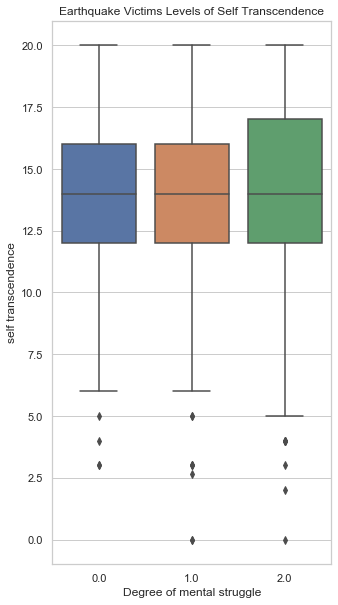

In [961]:
fig,ax = plt.subplots(figsize=(5,10))

ax = sns.boxplot(x=df_df['Degree of mental struggle'], y=df_df['self transcendence'], data=df_df)
#ax = jitterplot('self transcendence')
ax.set_title('Earthquake Victims Levels of Self Transcendence')
plt.savefig('Images/SelfTranscendence.png')

In [582]:
df_asm = pd.DataFrame()

In [583]:
df_asm['Degree of mental struggle'] = df_df['Degree of mental struggle']

In [604]:
df_asm['Age'] = df_agesex['Age']
df_asm['Sex'] = df_agesex['Sex']
df_asm.dropna(inplace=True)
df_asm


,Degree of mental struggle,Age,Sex
ID,,,
1,1.0,3.0,1.0
2,0.0,2.0,2.0
3,0.0,2.0,1.0
4,0.0,5.0,1.0
5,0.0,4.0,1.0
...,...,...,...
1407,0.0,3.0,2.0
1408,2.0,4.0,2.0
1409,2.0,2.0,2.0


In [650]:
df_asm[(df_asm['Sex']==1) & (df_asm['Age']==1)]['Degree of mental struggle'].value_counts()

0.0    20
1.0    11
2.0     3
Name: Degree of mental struggle, dtype: int64

In [660]:
df_asm[(df_asm['Sex']==2) & (df_asm['Age']==1)]['Age']

ID
63      1.0
75      1.0
81      1.0
108     1.0
117     1.0
125     1.0
199     1.0
231     1.0
359     1.0
389     1.0
420     1.0
455     1.0
514     1.0
550     1.0
574     1.0
586     1.0
622     1.0
632     1.0
641     1.0
652     1.0
685     1.0
686     1.0
714     1.0
732     1.0
824     1.0
891     1.0
948     1.0
988     1.0
1044    1.0
1095    1.0
1131    1.0
1174    1.0
1258    1.0
1261    1.0
1273    1.0
1282    1.0
1317    1.0
1319    1.0
1323    1.0
1333    1.0
1383    1.0
1385    1.0
1400    1.0
Name: Age, dtype: float64

In [699]:
groupie=df_asm.groupby(['Age','Sex'])

In [968]:
x=groupie['Degree of mental struggle'].value_counts().values
print(x[:-3:3])
print(x[1:-3:3])
print(groupie["Degree of mental struggle"].value_counts())

[20 22 23 41 32 48 40 65 66 91 50 68]
[11 11 19 25 29 47 39 54 38 84 48 40]
Age  Sex  Degree of mental struggle
1.0  1.0  0.0                          20
          1.0                          11
          2.0                           3
     2.0  0.0                          22
          1.0                          11
          2.0                          10
2.0  1.0  1.0                          23
          0.0                          19
          2.0                          12
     2.0  0.0                          41
          1.0                          25
          2.0                          14
3.0  1.0  1.0                          32
          0.0                          29
          2.0                          15
     2.0  1.0                          48
          0.0                          47
          2.0                          32
4.0  1.0  1.0                          40
          0.0                          39
          2.0                          23
     2

In [676]:
groupie['Degree of mental struggle'].value_counts()

Sex  Degree of mental struggle
1.0  0.0                          224
     1.0                          192
     2.0                          111
2.0  0.0                          334
     1.0                          264
     2.0                          170
Name: Degree of mental struggle, dtype: int64

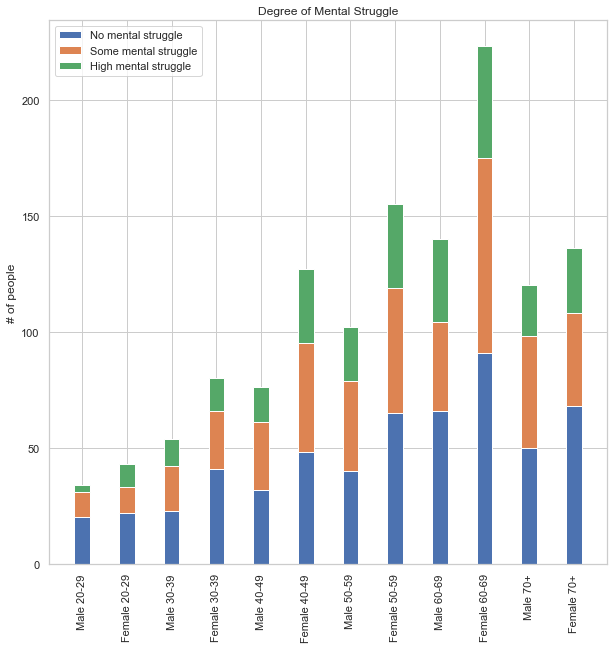

<Figure size 432x288 with 0 Axes>

In [970]:
labels = ['Male 20-29', 'Female 20-29','Male 30-39', 'Female 30-39','Male 40-49', 'Female 40-49','Male 50-59', 'Female 50-59','Male 60-69', 'Female 60-69','Male 70+', 'Female 70+']
none = x[:-3:3]
one = x[1:-3:3]
two = x[2:-3:3]
width = 0.35     

fig, ax = plt.subplots(figsize=(10,10))

ax.bar(labels, none, width, label='No mental struggle')
ax.bar(labels, one, width,bottom=none,label='Some mental struggle')
ax.bar(labels, two, width,bottom=one+none,label='High mental struggle')

ax.set_ylabel('# of people')
ax.set_title('Degree of Mental Struggle')

ax.legend()
plt.xticks(rotation=90)
plt.show()
plt.savefig('Images/StackedBar.png')

In [967]:
print(none)

[-0.5        -0.48795181 -0.47590361 -0.46385542 -0.45180723 -0.43975904
 -0.42771084 -0.41566265 -0.40361446 -0.39156627 -0.37951807 -0.36746988
 -0.35542169 -0.34337349 -0.3313253  -0.31927711 -0.30722892 -0.29518072
 -0.28313253 -0.27108434 -0.25903614 -0.24698795 -0.23493976 -0.22289157
 -0.21084337 -0.19879518 -0.18674699 -0.1746988  -0.1626506  -0.15060241
 -0.13855422 -0.12650602 -0.11445783 -0.10240964 -0.09036145 -0.07831325
 -0.06626506 -0.05421687 -0.04216867 -0.03012048 -0.01807229 -0.0060241
  0.0060241   0.01807229  0.03012048  0.04216867  0.05421687  0.06626506
  0.07831325  0.09036145  0.10240964  0.11445783  0.12650602  0.13855422
  0.15060241  0.1626506   0.1746988   0.18674699  0.19879518  0.21084337
  0.22289157  0.23493976  0.24698795  0.25903614  0.27108434  0.28313253
  0.29518072  0.30722892  0.31927711  0.3313253   0.34337349  0.35542169
  0.36746988  0.37951807  0.39156627  0.40361446  0.41566265  0.42771084
  0.43975904  0.45180723  0.46385542  0.47590361  0.

In [759]:
print(x[::3])
print(len(x[1::3]))
print(len(x[2::3]))

[ 1  3 11 15 22 23 29 36 39 41 48 54 68]
13
13


In [820]:
df_df['emotional regulation'].describe()

count    1304.000000
mean       13.185072
std         3.288416
min         0.000000
25%        12.000000
50%        13.000000
75%        15.000000
max        20.000000
Name: emotional regulation, dtype: float64

In [881]:
1304/4

326.0

# State a scientific yes/no question



#### People who tested in Quartile 1 of emotional regulation are more likely to evacuate right away (considered the 'correct' decision) than people who tested below Quartile 3.

# Take a skeptical stance: state a null hypothesis

#### After hearing the warning that a tsunami and earthquake is coming, People in quartile 1 of emotional regulation are no more likely to evacuate the area than people below quartile 3.


$$ p_1 = P(\text{Evacuating immediately after the first and only earthquake/tsunami warning}) $$
$$ p_3 = P(\text{Evacuating immediately after the first and only earthquake/tsunami warning}) $$


$$ H_0: \ p_1 \leq p_3 $$



# State the opposite of your null hypothesis: the alternative hypothesis

#### People who tested in Quartile 1 of emotional regulation are not more likely to evacuate right away (considered the 'correct' decision) than people who tested below Quartile 3.

# Create a probabilistic model of the situation when the null is true

$$ \text{Frequency that people in the top 25 % of emotional regulation evacuated immediately after the warning signs} \approx \nor \bigl( p_M, \sqrt{\frac{p_M(1-p_M)}{304}} \bigr) $$
$$ \text{Frequency that people in the bottom 25 % of emotional regulation evacuated immediately after the warning signs} \approx \nor \bigl( p_N, \sqrt{\frac{p_N(1-p_N)}{353}} \bigr) $$

The reason for different sample sizes despite both being 25% of the same sample is due to the way the personality test was given. For emotional regulation questions specifically people were ranked between 0 and 20. This ultimately lead to the size of each quartile not being exactly equal as there were many duplicate results at the edges of each quartile. In this case the bottom quartile was capped at a ranking of 12/20 but many people scored exactly 12/20 making for each one of them being included in the bottom quartile (less than or equal to the bottom 25% of the sample size).

# Determine how surprised you need to be to reject the null: determine a rejection level alpha

 $$ \alpha = 0.05 $$

# Collect your data

In [931]:
#WHAT IS THE VALUE FOR 8000?????

shared_sample_freq = (185.0 + 180.0) / 657
#shared_sample_variance = 657 * (shared_sample_freq * (1 - shared_sample_freq)) / 8000
shared_sample_variance = (((shared_sample_freq * (1 - shared_sample_freq))/185) +(((shared_sample_freq * (1 - shared_sample_freq))/180)))
difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

In [926]:
#Difference in SAMPLE PROPORTIONS
Q1= 185/304
Q3 = 180/353
diff_sample = Q1-Q3
diff_sample

0.09863761741464139

# Calculate p-value

$$P(\text{Difference in proportions equal to or more extreme than observed} \mid \text{Null hypothesis}) $$

In [932]:
p_value = 1 - difference_in_proportions.cdf(diff_sample)
p_value

0.028977875826726063

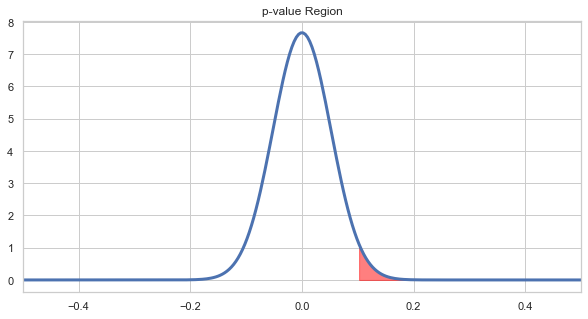

In [971]:
# p-val region
fig, ax = plt.subplots(1, figsize=(10, 5))

x = np.linspace(-.5, .5, num=250)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.fill_between(x, difference_in_proportions.pdf(x), where=(x >= diff_sample),
                color="red", alpha=0.5)
ax.set_xlim(-.5, .5)
ax.set_title("p-value Region");
plt.savefig('Images/Pvalue.png')

### P Value is less than null thus we can reject our null hypothesis

In [858]:
newnewdf=df_df.copy()

In [860]:
newnewdf['evac']=df_imevac_health_domains[1]

In [897]:
newnewdf=newnewdf.dropna(subset=['evac'])
newnewdf=newnewdf.dropna(subset=['emotional regulation'])

In [915]:
newnewdf.describe()

,etiquette,altruism,emotional regulation,leadership,problem solving,self improvement,self transcendence,stubbornness,Degree of mental struggle,evac
count,874.000000,874.000000,874.000000,874.000000,874.000000,868.000000,873.000000,874.000000,874.000000,874.000000
mean,12.439931,15.771739,13.327231,12.900744,16.347445,8.664171,14.351279,14.690789,0.806636,1.469108
std,2.284992,4.018360,3.239844,4.696112,4.033043,3.168719,3.158376,4.370970,0.774982,0.499330
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,11.000000,14.000000,12.000000,10.000000,14.000000,7.000000,12.000000,12.000000,0.000000,1.000000
50%,13.000000,16.000000,13.000000,13.000000,16.000000,9.000000,15.000000,15.000000,1.000000,1.000000
75%,14.000000,18.000000,15.000000,16.000000,19.000000,11.000000,16.000000,18.000000,1.000000,2.000000
max,15.000000,25.000000,20.000000,25.000000,25.000000,15.000000,20.000000,25.000000,2.000000,2.000000


In [925]:
#Q1 who evactuated immediately
#304 people with emo reg equal to or greeater than 15
newnewdf[(newnewdf['emotional regulation'] >= 15)  & (newnewdf['evac']==1)]

,etiquette,altruism,emotional regulation,leadership,problem solving,self improvement,self transcendence,stubbornness,Degree of mental struggle,evac
ID,,,,,,,,,,
12,15.0,22.0,15.0,19.0,15.0,8.0,20.0,6.0,0.0,1.0
15,15.0,16.0,19.0,19.0,23.0,11.0,18.0,17.0,0.0,1.0
24,15.0,24.0,18.0,22.0,24.0,13.0,20.0,20.0,2.0,1.0
38,12.0,16.0,16.0,16.0,17.0,11.0,18.0,17.0,0.0,1.0
64,13.0,20.0,16.0,18.0,19.0,15.0,14.0,22.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1361,11.0,15.0,16.0,10.0,16.0,8.0,19.0,14.0,0.0,1.0
1376,14.0,20.0,16.0,16.0,16.0,4.0,16.0,16.0,1.0,1.0
1390,12.0,16.0,20.0,13.0,14.0,11.0,20.0,22.0,2.0,1.0


In [924]:
#Q1 who evactuated immediately
#353 people with emo reg equal to or less than 12

newnewdf[(newnewdf['emotional regulation'] <= 12)& (newnewdf['evac']==1)]

,etiquette,altruism,emotional regulation,leadership,problem solving,self improvement,self transcendence,stubbornness,Degree of mental struggle,evac
ID,,,,,,,,,,
2,10.0,16.0,12.0,5.0,19.0,6.0,14.0,17.0,0.0,1.0
4,12.0,22.0,11.0,10.0,18.0,8.0,14.0,20.0,0.0,1.0
16,15.0,18.0,10.0,11.0,19.0,6.0,18.0,9.0,0.0,1.0
23,13.0,17.0,11.0,17.0,15.0,9.0,13.0,16.0,0.0,1.0
39,11.0,10.0,11.0,5.0,0.0,0.0,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1381,15.0,25.0,12.0,17.0,21.0,4.0,18.0,12.0,1.0,1.0
1387,11.0,14.0,12.0,16.0,19.0,5.0,16.0,19.0,0.0,1.0
1395,8.0,12.0,12.0,16.0,18.0,12.0,11.0,18.0,0.0,1.0


In [936]:
#ttest or z score??

In [ ]:
#does a two sample test have to be from two seperate samples or can it be from two seperate portions of the same sample?

In [ ]:
#bias as people are essentially self diagnosing themselves ala a myers briggs test.